In [1]:
"""FC3 Genetic Alorithm from El Rosario to Consulado"""

import random
from typing import List, Tuple
from rutas import *
from values import *

In [2]:

Genome = Tuple[List[int], int, List[str], List[Tuple[str, str]]]
# List of indexes, time, lineas, stages

def generate_genome(rutas: List[Ruta], start_point: str, end_point: str) -> Genome:
    current_point = start_point
    indexes = []
    stages = []
    while current_point != end_point:
        available_routes = [i for i, ruta in enumerate(rutas) if current_point == ruta.start]
        if not available_routes:
            raise ValueError(f"No available routes from {current_point}")
        i = random.choice(available_routes)
        indexes.append(i)
        next_point = rutas[i].end
        stages.append((current_point, next_point))
        current_point = next_point
    time = sum(rutas[i].time for i in indexes)
    lineas = [rutas[i].linea for i in indexes]
    genome_str = f" El tiempo fue de: {time}, Rutas disponibles tomadas: {indexes}, Las estaciones fueron de: {stages}, en las lineas: {lineas},"
    return indexes, time, lineas, stages, genome_str

genome = generate_genome(rutas, start_point, end_point)
print(genome[4])

 El tiempo fue de: 23, Rutas disponibles tomadas: [31, 81, 26, 32, 69, 14, 33, 22, 29, 108], Las estaciones fueron de: [('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'Politécnico'), ('Politécnico', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'Deportivo 18 de Marzo'), ('Deportivo 18 de Marzo', 'Indios Verdes'), ('Indios Verdes', 'Deportivo 18 de Marzo'), ('Deportivo 18 de Marzo', 'Martín Carrera'), ('Martín Carrera', 'Consulado'), ('Consulado', 'Oceanía'), ('Oceanía', 'San Lázaro')], en las lineas: ['6', '5', '5', '6', '3', '3', '6', '4', '5', 'B'],


In [3]:
# Population
Population = List[Genome]

def generate_population(rutas: List[Ruta], size_pop) -> Population:
    """function to generate a population of genomes"""
    return [generate_genome(rutas, start_point, end_point) for _ in range(size_pop)]

population = generate_population(rutas, size_pop)
print('\n'.join(map(str, population)))

([34, 35, 36, 37, 92, 37, 92, 91, 42, 74, 19, 97, 0, 73, 72, 50, 51, 24, 79, 78, 29, 54, 109, 108], 56, ['7', '7', '7', '7', '7', '7', '7', '7', '9', '3', '3', '9', '1', '3', '3', 'B', 'B', '4', '4', '4', '5', 'B', 'B', 'B'], [('El Rosario', 'Tacuba'), ('Tacuba', 'Tacubaya'), ('Tacubaya', 'Mixcoac'), ('Mixcoac', 'Barranca del Muerto'), ('Barranca del Muerto', 'Mixcoac'), ('Mixcoac', 'Barranca del Muerto'), ('Barranca del Muerto', 'Mixcoac'), ('Mixcoac', 'Tacubaya'), ('Tacubaya', 'Centro Médico'), ('Centro Médico', 'Balderas'), ('Balderas', 'Centro Médico'), ('Centro Médico', 'Tacubaya'), ('Tacubaya', 'Balderas'), ('Balderas', 'Hidalgo'), ('Hidalgo', 'Guerrero'), ('Guerrero', 'Garibaldi'), ('Garibaldi', 'Morelos'), ('Morelos', 'Candelaria'), ('Candelaria', 'Morelos'), ('Morelos', 'Consulado'), ('Consulado', 'Oceanía'), ('Oceanía', 'Ciudad Azteca'), ('Ciudad Azteca', 'Oceanía'), ('Oceanía', 'San Lázaro')], " El tiempo fue de: 56, Rutas disponibles tomadas: [34, 35, 36, 37, 92, 37, 92, 91

In [4]:
def fitness(genome: Genome, rutas: List[Ruta]) -> float:
    """function to calculate the fitness of a genome"""
    time = genome[1]  # genome[1] is the total time
    value = 1/time if time != 0 else 0  # Avoid division by zero
    return value

In [5]:
def elitism(population: Population, rutas: List[Ruta], elite_size: int) -> Population:
    """function to carry over the top individuals to the next generation"""
    fitness_values = [(genome, fitness(genome, rutas)) for genome in population]
    sorted_by_fitness = sorted(fitness_values, key=lambda x: x[1], reverse=True)
    elite = [genome for genome in sorted_by_fitness[:elite_size]]
    return elite, fitness_values, sorted_by_fitness

elite, fitness_values, sorted_by_fitness = elitism(population, rutas, elite_size)

print("\nFitness values:")
for i, genome in enumerate(population):
    print(fitness_values[i][1])

print("\nFitness values afer sorting:")
for i, genome in enumerate(population):
    print(sorted_by_fitness[i][1])

print("\nBest genomes:")
for genome in elite:
    print(genome)


Fitness values:
0.017857142857142856
0.00847457627118644
0.0022471910112359553
0.029411764705882353
0.007194244604316547

Fitness values afer sorting:
0.029411764705882353
0.017857142857142856
0.00847457627118644
0.007194244604316547
0.0022471910112359553

Best genomes:
(([31, 86, 31, 32, 33, 22, 29, 84, 23, 52], 34, ['6', '6', '6', '6', '6', '4', '5', '5', '4', 'B'], [('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'El Rosario'), ('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'Deportivo 18 de Marzo'), ('Deportivo 18 de Marzo', 'Martín Carrera'), ('Martín Carrera', 'Consulado'), ('Consulado', 'Oceanía'), ('Oceanía', 'Consulado'), ('Consulado', 'Morelos'), ('Morelos', 'San Lázaro')], " El tiempo fue de: 34, Rutas disponibles tomadas: [31, 86, 31, 32, 33, 22, 29, 84, 23, 52], Las estaciones fueron de: [('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'El Rosario'), ('El Rosario', 'Instituto del Petroleo'), ('Instituto del Pe

No tengo idea como hacer el crossover, supongo que cuando haya un punto en comun, pero pueden tomar muchos muchos muchos caminos, mejor solo usamos elitismo

In [6]:

def mutate_genome(genome: Genome, rutas: List[Ruta], start_point: str, end_point: str) -> Genome:
    """function to mutate a genome"""
    # Choose a random index to mutate
    index_to_mutate = random.randint(1, len(genome[0]) - 1)
    new_start_point = rutas[genome[0][index_to_mutate - 1]].end
    # Generate a new route
    new_route = generate_genome(rutas, new_start_point, end_point)

    # Create the new genome
    new_genome = list(genome)
    new_genome[0] = new_genome[0][:index_to_mutate] + new_route[0]
    new_genome[1] = sum(rutas[i].time for i in new_genome[0])
    new_genome[2] = [rutas[i].linea for i in new_genome[0]]
    new_genome[3] = [(rutas[i].start, rutas[i].end) for i in new_genome[0]]
    new_genome[4] = f" El tiempo fue de: {new_genome[1]}, Rutas disponibles tomadas: {new_genome[0]}, Las estaciones fueron de: {new_genome[3]}, en las lineas: {new_genome[2]},"

    return (new_genome)

print("\nOriginal genome:")
print(population[0])

print("\nMutated genome:")
print(mutate_genome(population[0], rutas, start_point, end_point))



Original genome:
([34, 35, 36, 37, 92, 37, 92, 91, 42, 74, 19, 97, 0, 73, 72, 50, 51, 24, 79, 78, 29, 54, 109, 108], 56, ['7', '7', '7', '7', '7', '7', '7', '7', '9', '3', '3', '9', '1', '3', '3', 'B', 'B', '4', '4', '4', '5', 'B', 'B', 'B'], [('El Rosario', 'Tacuba'), ('Tacuba', 'Tacubaya'), ('Tacubaya', 'Mixcoac'), ('Mixcoac', 'Barranca del Muerto'), ('Barranca del Muerto', 'Mixcoac'), ('Mixcoac', 'Barranca del Muerto'), ('Barranca del Muerto', 'Mixcoac'), ('Mixcoac', 'Tacubaya'), ('Tacubaya', 'Centro Médico'), ('Centro Médico', 'Balderas'), ('Balderas', 'Centro Médico'), ('Centro Médico', 'Tacubaya'), ('Tacubaya', 'Balderas'), ('Balderas', 'Hidalgo'), ('Hidalgo', 'Guerrero'), ('Guerrero', 'Garibaldi'), ('Garibaldi', 'Morelos'), ('Morelos', 'Candelaria'), ('Candelaria', 'Morelos'), ('Morelos', 'Consulado'), ('Consulado', 'Oceanía'), ('Oceanía', 'Ciudad Azteca'), ('Ciudad Azteca', 'Oceanía'), ('Oceanía', 'San Lázaro')], " El tiempo fue de: 56, Rutas disponibles tomadas: [34, 35, 36, 

In [7]:
def mutate_best_genome(population: Population, rutas: List[Ruta], start_point: str, end_point: str) -> Genome:
    """function to mutate the genome with the best fitness score"""
    # Calculate fitness scores for the population
    fitness_scores = [fitness(genome, rutas) for genome in population]
    # Identify the genome with the best fitness score
    best_genome = population[fitness_scores.index(max(fitness_scores))]
    # Mutate the best genome
    mutated_best_genome = mutate_genome(best_genome, rutas, start_point, end_point)

    return mutated_best_genome

print("Original best genome: ")
print(elite[0])

print("\nMutated genome with best fitness score:")
print(mutate_best_genome(population, rutas, start_point, end_point))

Original best genome: 
(([31, 86, 31, 32, 33, 22, 29, 84, 23, 52], 34, ['6', '6', '6', '6', '6', '4', '5', '5', '4', 'B'], [('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'El Rosario'), ('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'Deportivo 18 de Marzo'), ('Deportivo 18 de Marzo', 'Martín Carrera'), ('Martín Carrera', 'Consulado'), ('Consulado', 'Oceanía'), ('Oceanía', 'Consulado'), ('Consulado', 'Morelos'), ('Morelos', 'San Lázaro')], " El tiempo fue de: 34, Rutas disponibles tomadas: [31, 86, 31, 32, 33, 22, 29, 84, 23, 52], Las estaciones fueron de: [('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'El Rosario'), ('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'Deportivo 18 de Marzo'), ('Deportivo 18 de Marzo', 'Martín Carrera'), ('Martín Carrera', 'Consulado'), ('Consulado', 'Oceanía'), ('Oceanía', 'Consulado'), ('Consulado', 'Morelos'), ('Morelos', 'San Lázaro')], en las lineas: ['6', '6', '6',

In [8]:
mutation_rate = 0
def create_new_population(population: Population, rutas: List[Ruta], elite_size: int, mutation_rate: float) -> Population:
    """function to create a new population"""
    # Select the elite individuals
    elite = elitism(population, rutas, elite_size)
    # Generate mutations of the elite individuals
    mutations = [mutate_genome(genome, rutas, start_point, end_point) for genome in elite if random.random() < mutation_rate]
    # Create the new population
    new_population = list(elite) + mutations
    return new_population

new_population = create_new_population(population, rutas, elite_size, mutation_rate)

print("\nNew population:")
print('\n'.join(map(str, new_population)))




New population:
[(([31, 86, 31, 32, 33, 22, 29, 84, 23, 52], 34, ['6', '6', '6', '6', '6', '4', '5', '5', '4', 'B'], [('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'El Rosario'), ('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'Deportivo 18 de Marzo'), ('Deportivo 18 de Marzo', 'Martín Carrera'), ('Martín Carrera', 'Consulado'), ('Consulado', 'Oceanía'), ('Oceanía', 'Consulado'), ('Consulado', 'Morelos'), ('Morelos', 'San Lázaro')], " El tiempo fue de: 34, Rutas disponibles tomadas: [31, 86, 31, 32, 33, 22, 29, 84, 23, 52], Las estaciones fueron de: [('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'El Rosario'), ('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'Deportivo 18 de Marzo'), ('Deportivo 18 de Marzo', 'Martín Carrera'), ('Martín Carrera', 'Consulado'), ('Consulado', 'Oceanía'), ('Oceanía', 'Consulado'), ('Consulado', 'Morelos'), ('Morelos', 'San Lázaro')], en las lineas: ['6', '6', '6', '6',

In [9]:
def create_new_population(population: Population, rutas: List[Ruta], elite_size: int, mutation_rate: float) -> Population:
    """function to create a new population"""
    # Select the elite individuals
    elite, fitness_values, sorted_by_fitness = elitism(population, rutas, elite_size)
    random_genomes = [generate_genome(rutas, start_point, end_point) for _ in range(size_pop - len(elite))]
    
    new_population = (elite) + random_genomes
    return new_population

new_population = create_new_population(population, rutas, elite_size, mutation_rate)

print("\nNew population:")
for genome in new_population:
    print(genome)

print("Size of the new population:", len(new_population))
print("Size of the original population:", len(population))


New population:
(([31, 86, 31, 32, 33, 22, 29, 84, 23, 52], 34, ['6', '6', '6', '6', '6', '4', '5', '5', '4', 'B'], [('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'El Rosario'), ('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'Deportivo 18 de Marzo'), ('Deportivo 18 de Marzo', 'Martín Carrera'), ('Martín Carrera', 'Consulado'), ('Consulado', 'Oceanía'), ('Oceanía', 'Consulado'), ('Consulado', 'Morelos'), ('Morelos', 'San Lázaro')], " El tiempo fue de: 34, Rutas disponibles tomadas: [31, 86, 31, 32, 33, 22, 29, 84, 23, 52], Las estaciones fueron de: [('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'El Rosario'), ('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'Deportivo 18 de Marzo'), ('Deportivo 18 de Marzo', 'Martín Carrera'), ('Martín Carrera', 'Consulado'), ('Consulado', 'Oceanía'), ('Oceanía', 'Consulado'), ('Consulado', 'Morelos'), ('Morelos', 'San Lázaro')], en las lineas: ['6', '6', '6', '6', 


Final population:
((([31, 27, 28, 23, 52], 14, ['6', '5', '5', '4', 'B'], [('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'La Raza'), ('La Raza', 'Consulado'), ('Consulado', 'Morelos'), ('Morelos', 'San Lázaro')], " El tiempo fue de: 14, Rutas disponibles tomadas: [31, 27, 28, 23, 52], Las estaciones fueron de: [('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'La Raza'), ('La Raza', 'Consulado'), ('Consulado', 'Morelos'), ('Morelos', 'San Lázaro')], en las lineas: ['6', '5', '5', '4', 'B'],"), 0.07142857142857142), 14.0)
([31, 86, 31, 81, 26, 86, 34, 35, 0, 19, 74, 1, 94, 39, 94, 39, 56, 19, 20, 47, 67, 44, 80, 58, 3, 58, 57, 56, 55, 90, 35, 90, 89, 31, 32, 69, 14, 15, 28, 23, 52], 128, ['6', '6', '6', '5', '5', '6', '7', '7', '1', '3', '3', '1', '8', '8', '8', '8', '1', '3', '3', '12', '2', '9', '4', '1', '1', '1', '1', '1', '1', '7', '7', '7', '7', '6', '6', '3', '3', '3', '5', '4', 'B'], [('El Rosario', 'Instituto del Petroleo'), ('Institu

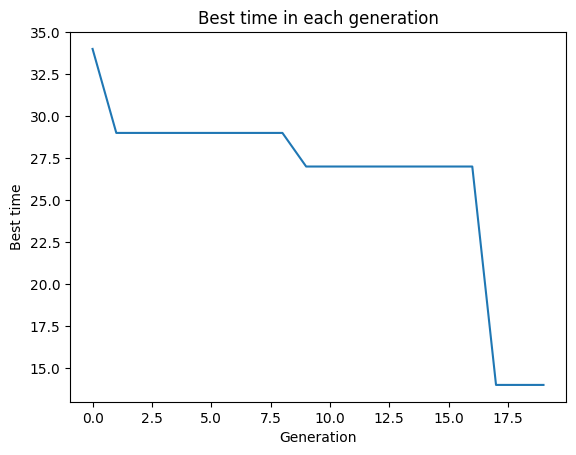

bests times:  [34.0, 29, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 27, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 14, 14.0, 14.0]


In [10]:
import matplotlib.pyplot as plt

def genetic_algorithm(rutas: List[Ruta], population: Population, num_generations: int, elite_size: int, mutation_rate: float):
    """function to run the genetic algorithm"""
    best_times = []
    for _ in range(num_generations):
        # Create a new population
        population = create_new_population(population, rutas, elite_size, mutation_rate)
        
        # Mutate the population
        for i in range(len(population)):
            if random.random() < mutation_rate:
                population[i] = mutate_genome(population[i], rutas, start_point, end_point)
                
        # Find the best time in this generation and add it to the list
        best_genome = max(population, key=lambda genome: fitness(genome, rutas))
        time = best_genome[1]
        best_times.append(1/time if time < 1 else time)
                
    # Return the final population and the list of best times
    return population, best_times

# Run the genetic algorithm
final_population, best_times = genetic_algorithm(rutas, population, num_generations, elite_size, mutation_rate)

# Print the final population
print("\nFinal population:")
for genome in final_population:
    print(genome)

# Print the best genome
best_genome = max(final_population, key=lambda genome: fitness(genome, rutas))
print("\nBest genome:")
print(best_genome)

# Plot the best times
plt.plot(best_times)
plt.title('Best time in each generation')
plt.xlabel('Generation')
plt.ylabel('Best time')
plt.show()

print("bests times: ", best_times)